# Convolutional Neural Network

- `컴퓨터 비전` 문제에 가장 main 으로 사용되는 풀이의 정수
- 물체 탐지 기술을 잘 구현하여 자율주행 , 장기 탐지 , 사람 행동감지 등에 폭넓은 분야에서 사용합니다.

> **`CNN`** 을 사용하면 이미지 데이터를 사용하여 학습할 때 주요하게 봐야할 것은 CNN 기술뿐아니라 `data augmentation(데이터 증강, 데이터늘리기)` , `batch normalization(배치정규화)` 도 주의깊게 살펴보아야합니다.

# CNN 설명 [1]

## `-` Why CNN used for image?

1. 이미지는 픽셀로 이루어져있다.
2. 픽셀은 행렬로써 `숫자들의 행렬`로 표현할 수 있다.
3. `flatten` 로 픽셀을 한 줄의 벡터로 펼쳐서 계산할 수 있다.

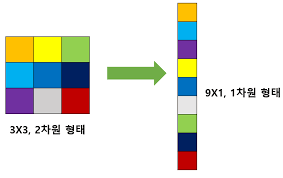 

`-` flatten 의 단점 : 이미지분석시에 이미지는 상호픽셀간의 유의미한 관계가 있다. (고양이라면 고양이 눈 주변의 픽셀들이 눈썹,흰자,검은자 등의 색에 관련되어서 숫자가 비슷하고 대조적으로 분류가 될 것이다.) 이 관계를 flatten 으로 모두 잃어 버리게 된다.

## 그래서 CNN 을 사용한다.

### `-` CNN

- CNN 기술로 부분적인 의존성을 캐치할 수 있고 (capturing the spatial dependencies) 덩어리끼리의 분석을 완전히 가능하게 한다.

- 각각의 이미지 덩어리는 일정 파라미터가 부여되고 `filter` 라는 것을 거치면서 좋은 가중치(weights)를 만들게한다.

- CNN 은 parameter 를 줄이면서 이미지를 분석하고 rendering 을 진행시켜 그 이미지의 특징을 분석할 수 있다.

## `-` CNN 의 input

`-` input <br>
image 이므로 0-255 의 색상이 존재 + 이미지의 픽셀수 + RGB 이다.

`-`
이미지의 픽셀수가 4x4 라면 4x4x3 또는 3x4x4 형태로 만들 수 있다.
<br>
`3` = RGB 로 1번 행렬은 R,  2번 행렬은 G , 3번 행렬은 B 가 들어가게 되어 이를 3개의 채널을 가지고 있다고 말한다.
<br>
3x4x4 는 3개의 채널(RGB)로 이루어진 4x4 행렬이다. (16개의 픽셀은 모두 0-255 의 숫자중 하나로 구성되어있기 때문이다.)
<br>
`-` channel <br>
RGB 가 3개의 채널도 되어있다고 하였는데 채널은 더 넓은 의미에서 쓰인다.
<br>
RGB 는 채널이 3개 명확하지만 앞으로 `filter` 를 거치면서 학습을 하면 채널의 수가 늘어났다가 줄어들며 학습을 진행하고 이 채널의 개수 자체가 가지는 의미는 딱히 없으며 채널의 수에 따라 학습을 더 잘하고 못하고는 결정될 수 있다. 
<br>
`-` filter <br>
filter 는 CNN 의 이미지를 처리하는 하나의 필터로 이전의 예시의 3x4x4 의 이미지에 연산을 진행시키는 행렬이다. 가볍게 image * filter => 새로운 image(이 이미지는 사람이 해석할 수 없고 숫자 계산단계라고 생각하면 편하다)

## `-` CNN 의 output
`-` output <br>
image matrix size = $h * w * c$ <br>
filter size = $f_h * f_w * c $ <br>
$output$ $ height =h- f_h +1$  <br>
$output$ $ width = w - f_w + 1 $ <br>
$output$ $ depth = 1 $ #depth = channel

CNN 실전 계산해보기 - CNN 의 계산과정을 Convolution 계산이라고 합니다.

실전계산은 쉽고 외울게 많으므로 부록에서 실시하겠습니다.

## `-` CNN 의 fully connected layers
<br>

`fully connected layers` 는 `FC layer` 이라고도 불린다. (FC layer 는 크게보면 기초이론상 모두 연결된 layer 로 DNN 을 초기에 설명할 때 자주 나왔던 perceptron 에 선이 연결된 모습이다.)
<br>
`fc layer` 는 cnn 의 한 사이클의 마지막 단계로 output data 이 나오기 직전단계이다.
<br>
[순서] <br>
`CNN과정` -> `flatten` -> `FC layer층` -> `output`
<br>

### `FC layer` 의 목적
`-` 분류를 위해 탐지된 모든 특징들을 고려하는 것.
<br>
`-` 보통의 FC layers 는 activation function(활성화함수)를 지나갔지만 현재 마지막에 사용하는 FC layer 는 softmax function 을 지나간다. ( FC layer 층은 여러개의 층으로 이루어져있다.)

<br>

`-` 첫 input size of FC layer
-  flatten 이 된 후의 벡터이다. 예를들어 3x3 이 마지막에 나온 사진이라면 이를 flatten 진행하여 9x1 이 된다.
<br>
`-` 마지막 output size of FC layer
- 이건 사용자가 정할 수 있고 정확하게 결정되어 있는 것이 아니고 마음대로 커스터마이징이 가능하다.
- 마지막 FC layer 는 class labels 의 개수와 마지막 크기를 맞추어주어야한다. (예를들어, MNIST 데이터에서 0~9 까지 숫자로 나와야한다면 class labels= 10 , 또는 cat and dogs 라면 class labels = 2 )


# `FC layers` 코드
```python

import torch.nn as nn
import torch.nn.functional as F

class CNN_network(nn.Module):

    def __init__(self):
        super(CNN_network,self).__init__()
        self.conv1 = nn.Conv2d(3,18,3,1,1)
        self.pool1 = nn.MaxPool2d(2,2)
        self.linear1 = nn.Linear(32*32*16,64)
        self.linear2 = nn.Linear(64,10)



    def forward(self,x):
        x= F.relu(self.conv1(x))
        x = self.pool1(x)
        x = x.view(-1,32*32*16) #현재 flatten 하는 코드
        x = F.relu(self.linear1(x)) #32*32*16 의 크기가 flatten 되어 숫자로나오고 64개의 parameter 로 바꿔주는 부분.
        x = F.log_softmax(self.linear2(x),dim=1) # 마지막부분에 softmax 사용해주는 모습.
        return x



```